## Data Dictionary

- **InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.**
- **StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.**
- **Description: Product (item) name. Nominal.** 
- **Quantity: The quantities of each product (item) per transaction. Numeric.**
- **InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.**
- **UnitPrice: Unit price. Numeric, Product price per unit in sterling.**
- **CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.**
- **Country: Country name. Nominal, the name of the country where each customer resides.**


## Import Libraries

In [1]:
#importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns  import apriori
from mlxtend.frequent_patterns  import association_rules

## Read and Load Data

In [2]:
df=pd.read_excel('Online Retail.xlsx')

## EDA

In [3]:
# number of rows and columns in data
df.shape

(541909, 8)

In [4]:
# first five rows in data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Cleaning

In [6]:
# checking missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# dropping columns with missing values
df.dropna(axis=0, inplace=True)

In [8]:
# Checking duplicates
df.duplicated().sum()

5225

In [9]:
# dropping duplicated rows
df.drop_duplicates(keep='first', inplace=True)

In [10]:
#changing the "InvoiceNo" column to string type
df["InvoiceNo"] = df["InvoiceNo"].astype('str')

In [11]:
#checking number of  "InvoiceNo" column transaction containing 'C'
df[df['InvoiceNo'].str.contains('C') ==True].shape

(8872, 8)

In [12]:
# getting the data with no cancelled transaction
df=df[~df['InvoiceNo'].str.contains('C') ==True]

In [13]:
# stripping values of the 'Description' column 
df['Description']=df['Description'].apply(lambda x: x.strip())

In [14]:
# getting the year, month and day from the 'InvoiceDate' column
df['Year']=pd.DatetimeIndex(df['InvoiceDate']).year
df['Month']=pd.DatetimeIndex(df['InvoiceDate']).month
df['Day']=pd.DatetimeIndex(df['InvoiceDate']).day

In [15]:
# describing the data
df.describe(include='O').T

,count,unique,top,freq
InvoiceNo,392732,18536,576339,542
StockCode,392732,3665,85123A,2023
Description,392732,3866,WHITE HANGING HEART T-LIGHT HOLDER,2016
Country,392732,37,United Kingdom,349227


In [16]:
# number of unique coutries in data
df.Country.nunique()

37

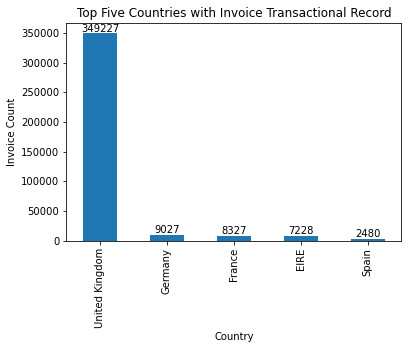

In [17]:
# plotting Top Five Countries with Invoice Transactional Record
ax=df.Country.value_counts(ascending=False)[0:5].plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title('Top Five Countries with Invoice Transactional Record')
plt.xlabel('Country')
plt.ylabel('Invoice Count')
plt.xticks(rotation = 90);

In [18]:
# Getting the data from united kingdom only
df_uk= df[df['Country'] =="United Kingdom"].reset_index(drop=True)

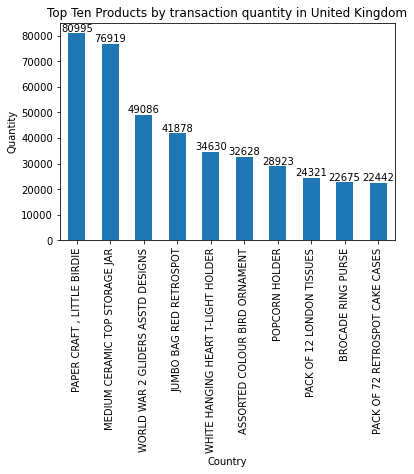

In [19]:
#top 10 most puchase product in uk by quantity
ax=df_uk.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[0:10].plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title('Top Ten Products by transaction quantity in United Kingdom')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation = 90);

## Generating Market Basket for Transactions from United Kingdom

In [20]:
# Generating market basket for united kingdom 
market_basket_uk=df_uk.groupby(['InvoiceNo', 'Description'])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo")

In [21]:
# shapeof market basket identified
market_basket_uk.shape

(16649, 3833)

In [22]:
#first five rows of market basket
market_basket_uk.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating function to hot encode the values

In [23]:
#Create function to hot encode the values
def encode_values(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

## Applying function to data

In [24]:
#Apply function to data
market_basket_encoded_uk = market_basket_uk.applymap(encode_values)

## filtering for only invoices with 2 or more items

In [25]:
#filter for only invoices with 2 or more items
market_basket_filtered_uk = market_basket_encoded_uk[(market_basket_encoded_uk > 0).sum(axis=1) >= 2]

## Generating the frequent itemsets

In [26]:
#Generate the frequent itemsets
frequent_itemsets_uk = apriori(market_basket_filtered_uk, min_support=0.03, use_colnames=True).sort_values("support",ascending=False)

C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [27]:
#shape of the frequent itemsets
frequent_itemsets_uk.shape

(108, 2)

In [28]:
#description the frequent itemsets
frequent_itemsets_uk.describe()

,support
count,108.000000
mean,0.043869
std,0.014869
min,0.030047
25%,0.033104
50%,0.040290
75%,0.048615
max,0.121358


In [29]:
# first five rows of the frequent itemsets
frequent_itemsets_uk.head()

,support,itemsets
99,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER)
44,0.093197,(JUMBO BAG RED RETROSPOT)
80,0.090466,(REGENCY CAKESTAND 3 TIER)
6,0.084417,(ASSORTED COLOUR BIRD ORNAMENT)
71,0.082986,(PARTY BUNTING)


In [30]:
#Sorting the frequent itemsets
frequent_itemsets_uk.sort_values('support',ascending=False).reset_index(drop=True).head()

,support,itemsets
0,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.093197,(JUMBO BAG RED RETROSPOT)
2,0.090466,(REGENCY CAKESTAND 3 TIER)
3,0.084417,(ASSORTED COLOUR BIRD ORNAMENT)
4,0.082986,(PARTY BUNTING)


## Applyng association rules

In [32]:
#Apply association rules
association_rules_uk = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=1).sort_values(["confidence","lift"],ascending=False).reset_index(drop=True)

In [33]:
#shape association rules identified
association_rules_uk.shape

(8, 9)

In [34]:
#association rules identified
association_rules_uk

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452
1,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952
2,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052680,0.093197,0.032908,0.624691,6.702899,0.027999,2.416152
3,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055086,0.072841,0.030632,0.556080,7.634188,0.026620,2.088574
4,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.064646,0.072841,0.031478,0.486922,6.684737,0.026769,1.807051
5,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.072841,0.064646,0.031478,0.432143,6.684737,0.026769,1.647164
6,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.072841,0.055086,0.030632,0.420536,7.634188,0.026620,1.630668
7,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.093197,0.052680,0.032908,0.353105,6.702899,0.027999,1.464412


- **the first association rule: having an antecedent item ‘GREEN REGENCY TEACUP AND SAUCER’ has the lowest antecedent support and its consequent item ‘ROSES REGENCY TEACUP AND SAUCER’ having also a low support value, indicating both items are not as much frequent in the frequency itemset as other item, however the association is with 0.777778 confidence value, indicating that if ‘GREEN REGENCY TEACUP AND SAUCER’  is purchased by a customer then ‘ROSES REGENCY TEACUP AND SAUCER’ much likely to be purchase alongside  with over 77% confidence by the same customer, the lift value of over 17 confirms that the association rule is high**
- **The second association rule is the converse of the first, it indicates that if ‘ROSES REGENCY TEACUP AND SAUCER’ is purchased by a customer then ‘GREEN REGENCY TEACUP AND SAUCER’ is much likely to be purchase alongside with over 70% confidence by the same customer, the lift value of 17.717202 confirms that the association rule is also strong.**
- **The third association rule having an antecedent item ‘JUMBO BAG PINK POLKADOT’ and its consequent item ‘'JUMBO BAG RED RETROSPOT'’ having an association with 0.624691 confidence value, indicating that if ‘JUMBO BAG PINK POLKADOT ‘is purchased by a customer then 'JUMBO BAG RED RETROSPOT' is much likely to be purchase alongside with over 62% confidence by the same customer, the lift value of 6.702899 confirms that the association rule is strong.** 
- **the fourth association rule having an antecedent item ‘LUNCH BAG PINK POLKADOT’ and its consequent item ‘LUNCH BAG RED RETROSPOT is having an association with 0.556080 confidence value, indicating that if ‘LUNCH BAG PINK POLKADOT’ is purchased by a customer then ‘LUNCH BAG RED RETROSPOT is much likely to be purchase alongside with over 55% confidence by the same customer, the lift value of 7.634188 confirms that the association rule is strong.**
- **the fifth association rule having an antecedent item ‘LUNCH BAG BLACK SKULL’ and its consequent item ‘LUNCH BAG RED RETROSPOT’ is having an association with 0.486922 confidence value, indicating that if ‘LUNCH BAG BLACK SKULL’ is purchased by a customer then ‘LUNCH BAG RED RETROSPOT is much likely to be purchase alongside with over 48% confidence by the same customer, the lift value of 6.684737 confirms that the association rule is strong.** 
- **the sixth association rule having an antecedent item ‘LUNCH BAG RED RETROSPOT’ and its consequent item ‘LUNCH BAG BLACK SKULL’ is having an association with 0.432143 confidence value, indicating that if ‘LUNCH BAG RED RETROSPOT’ is purchased by a customer then ‘LUNCH BAG BLACK SKULL’ is much likely to be purchase alongside with over 48% confidence by the same customer, the lift value of 6.684737 confirms that the association rule is strong.**
- **the seventh association rule having an antecedent item ‘LUNCH BAG RED RETROSPOT’ and its consequent item ‘LUNCH BAG PINK POLKADOT’ is having an association with 0.420536 confidence value, indicating that if ‘LUNCH BAG RED RETROSPOT’ is purchased by a customer then ‘LUNCH BAG PINK POLKADOT’ is much likely to be purchase alongside with over 42% confidence by the same customer, the lift value of 7.634188 confirms that the association rule is strong.** 

- **The eight-association rule is the converse of the third, it indicates that if 'JUMBO BAG RED RETROSPOT' is purchased by a customer then ‘JUMBO BAG PINK POLKADOT ‘is much likely to be purchase alongside with 0.353105 confidence value, the lift value of the association is 6.702899 which confirms that the association rule is also strong although it has the lowest confidence value ad highest support value, indicating the items occurs most frequently in the frequent itemset.**

